In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_csv('/content/wine.csv')
X = data.drop('Wine', axis=1)
y = data['Wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

dt_entropy.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_entropy.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9166666666666666


   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


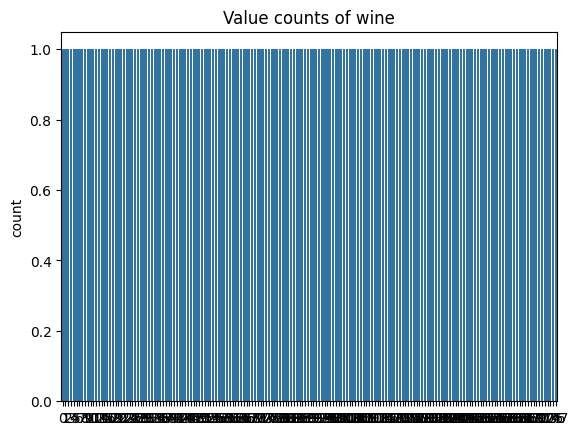

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/wine.csv')
print(df.head())
sns.countplot(df['Wine'])
plt.title('Value counts of wine')
plt.show()

In [ ]:
X = df.drop('Wine',axis=1)
# Putting response variable to y
y = df['Wine']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifier_rf.oob_score_

0.8591549295774648

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9758064516129032

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

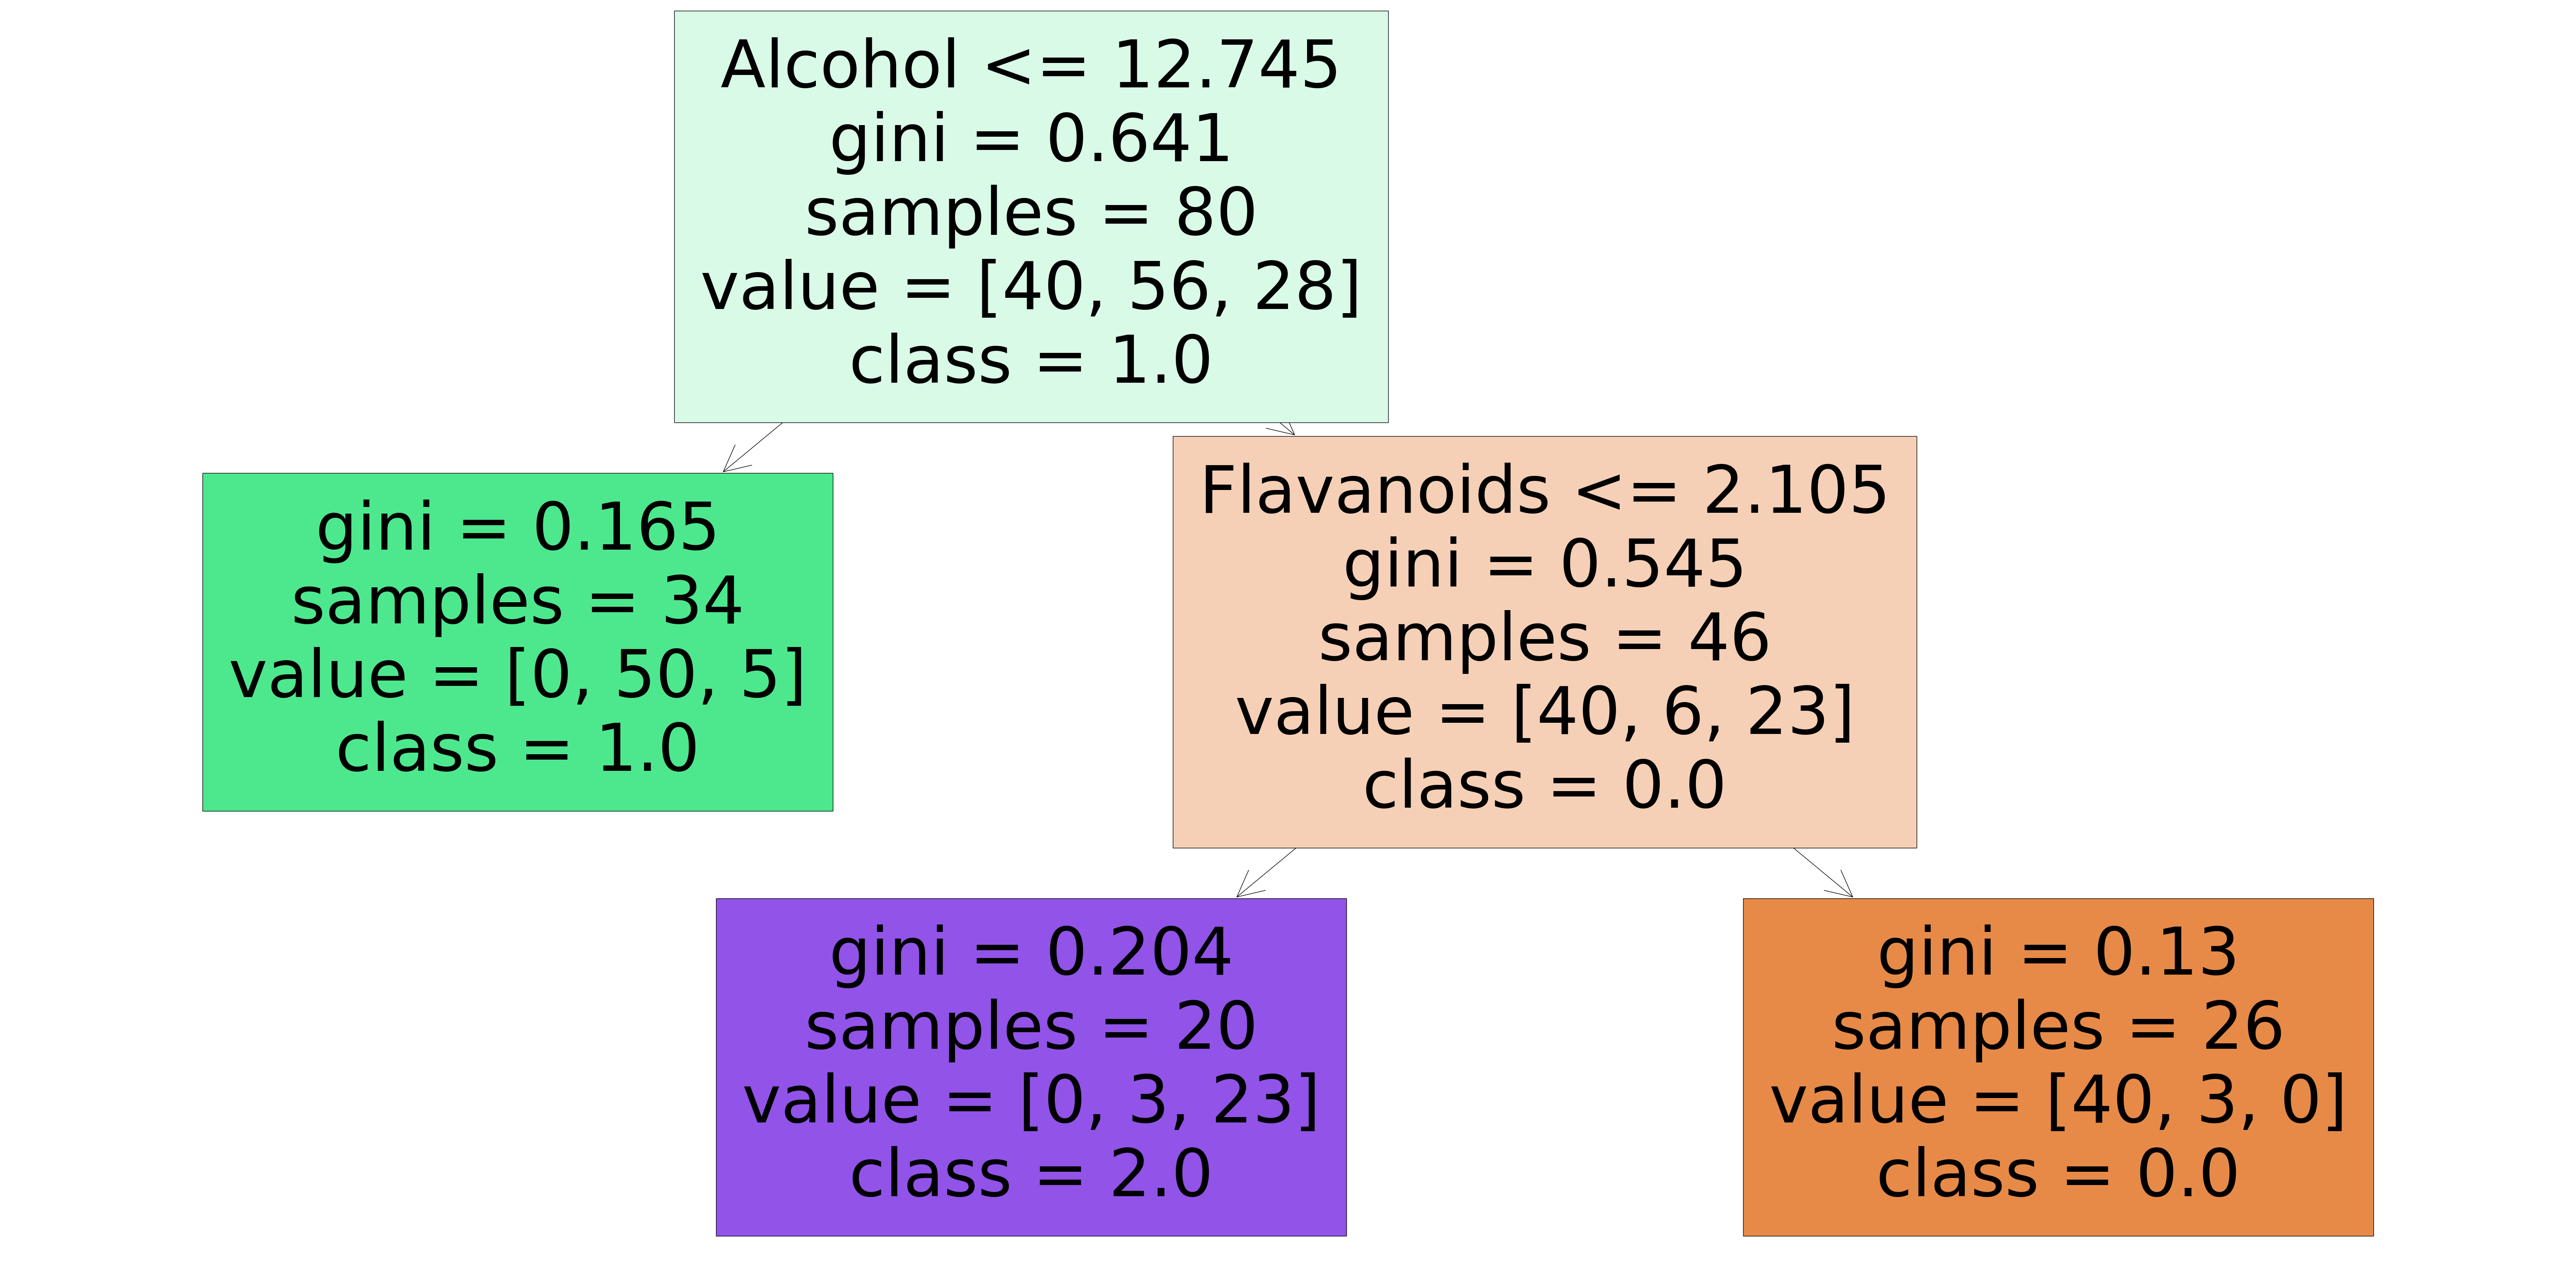

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the class names from the first tree in the forest
class_names_tree0 = rf_best.estimators_[0].classes_

# Convert class names to strings
class_names_tree0 = [str(name) for name in class_names_tree0] # Convert numeric class names to strings

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],
          feature_names = X.columns,
          class_names=class_names_tree0, # Use the classes seen by this tree
          filled=True);

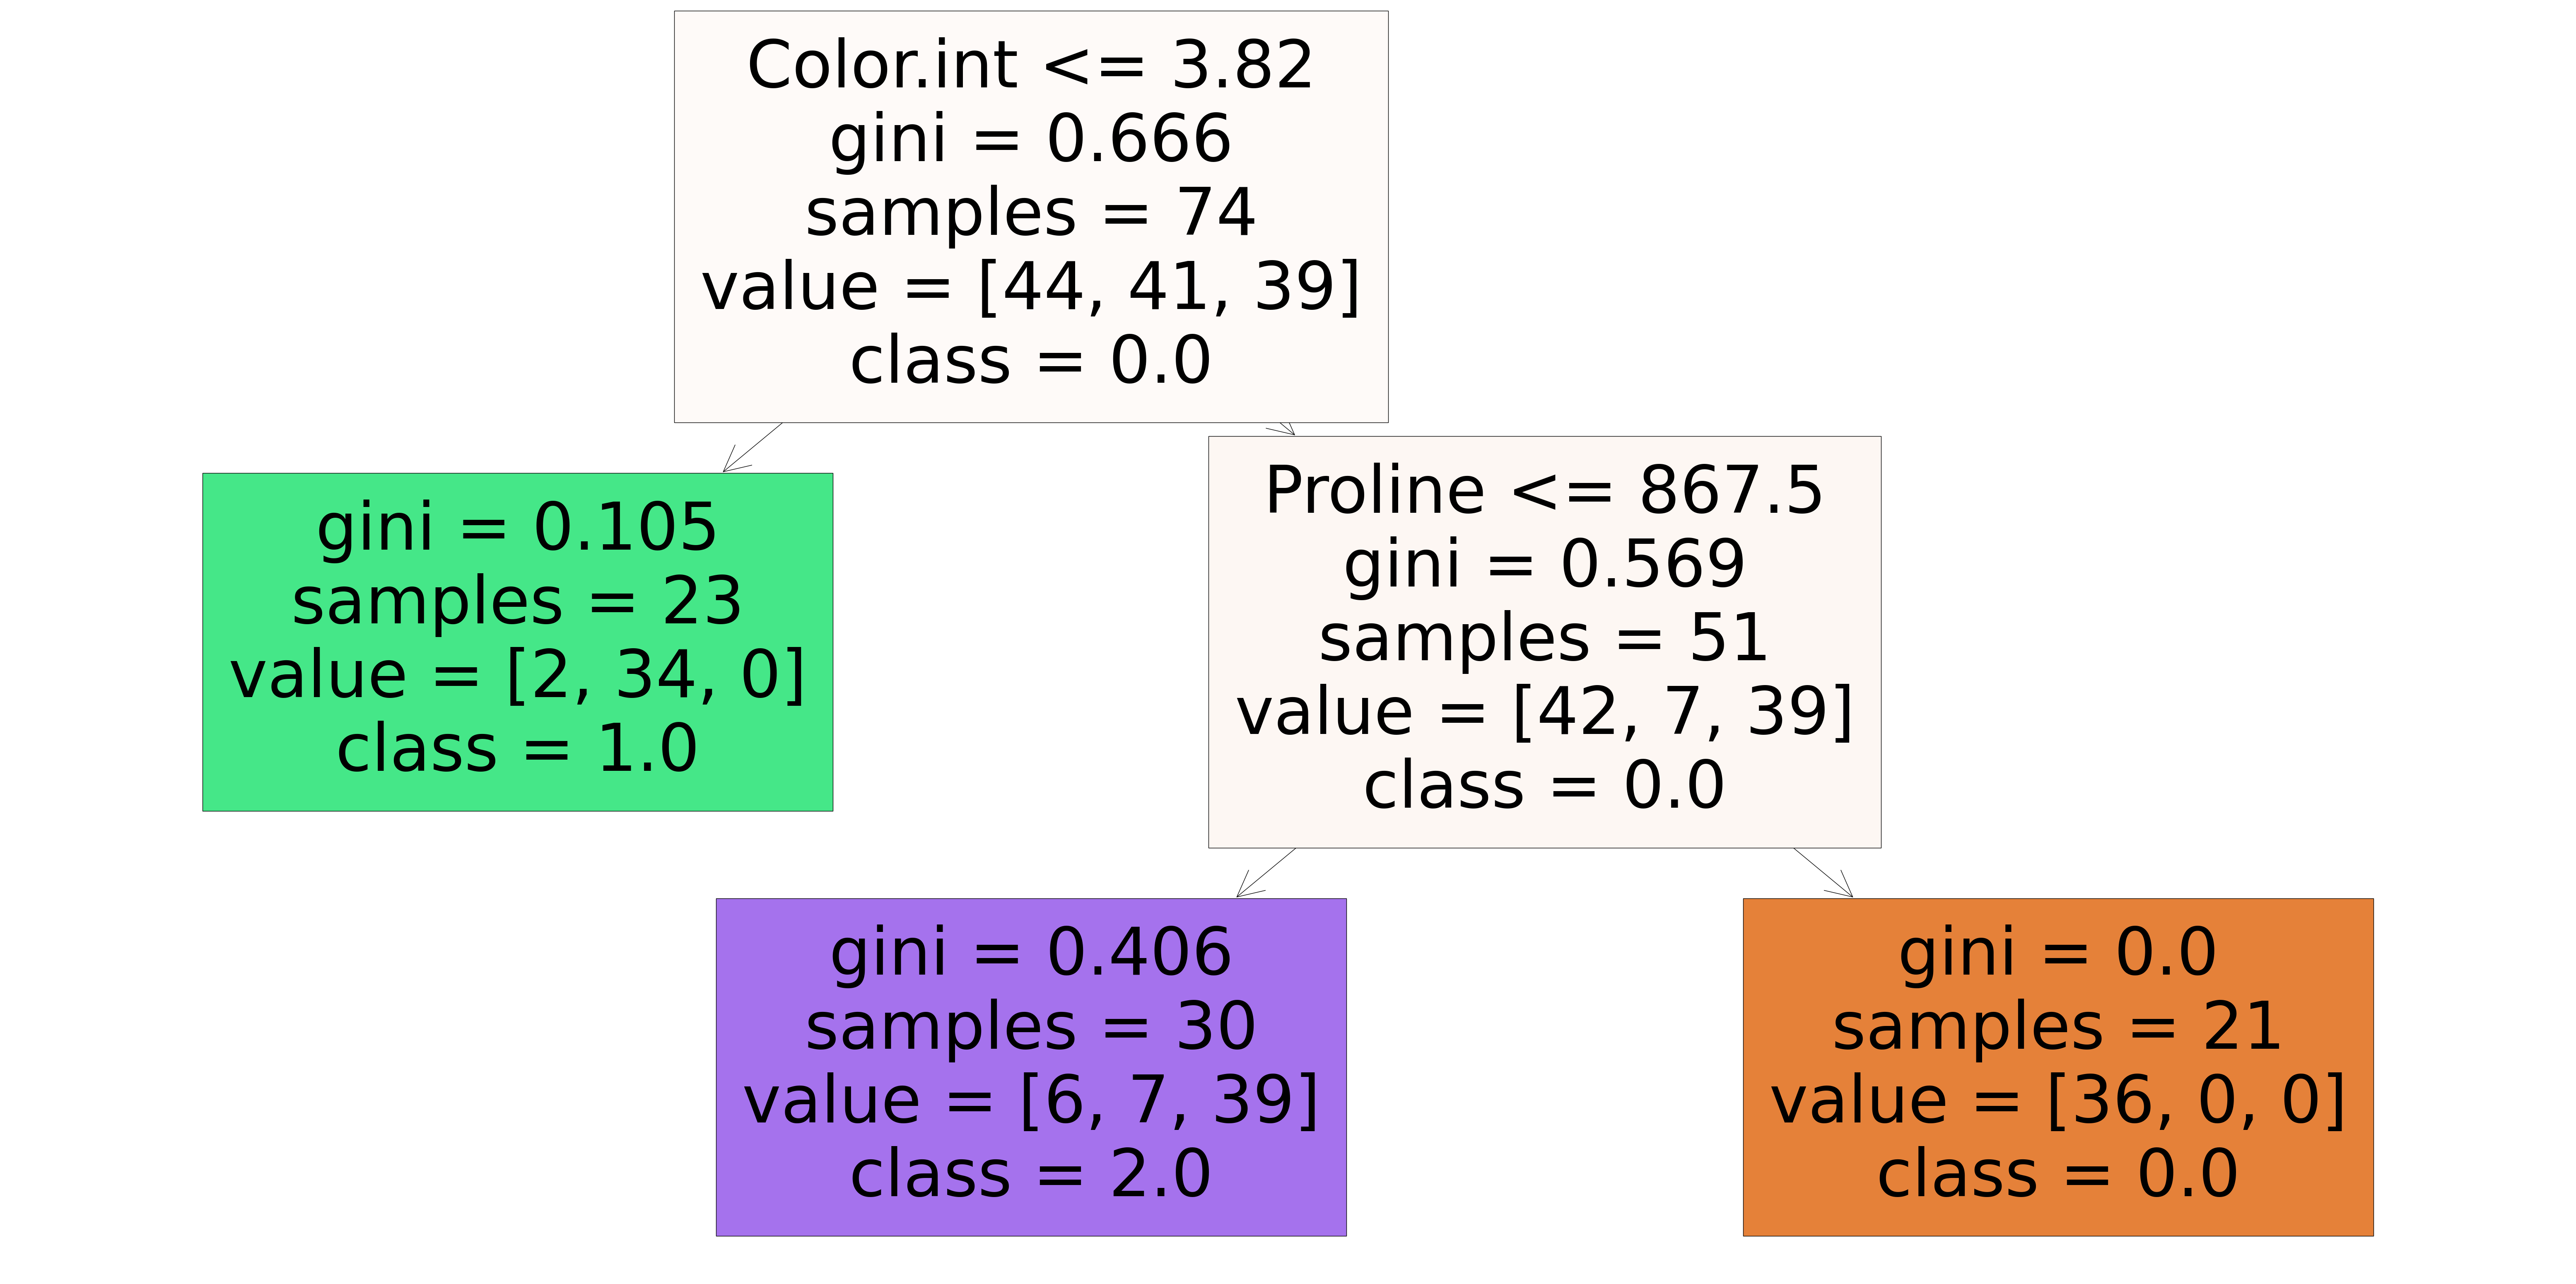

In [ ]:
class_names_tree0 = rf_best.estimators_[0].classes_

# Convert class names to strings
class_names_tree0 = [str(name) for name in class_names_tree0] # Convert numeric class names to strings

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9],
          feature_names = X.columns,
          class_names=class_names_tree0, # Use the classes seen by this tree
          filled=True);

In [ ]:
rf_best.feature_importances_

array([0.1253866 , 0.02623538, 0.00332874, 0.02792493, 0.02474741,
       0.06391343, 0.20648088, 0.00331875, 0.02276959, 0.17585277,
       0.06165209, 0.10328418, 0.15510524])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
6,Flavanoids,0.206481
9,Color.int,0.175853
12,Proline,0.155105
0,Alcohol,0.125387
11,OD,0.103284
5,Phenols,0.063913
10,Hue,0.061652
3,Acl,0.027925
1,Malic.acid,0.026235
4,Mg,0.024747
